In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [3]:
os.getcwd()

'/content'

In [0]:
os.chdir(r'./drive')#/My drive/ML dataSets'

In [0]:
os.chdir('My Drive/ML dataSets')

In [6]:
os.listdir(os.getcwd())

['food review',
 'bluebook for bulldozers',
 'titanic',
 'processedData.csv',
 'cricket vs baseball',
 'firstTraining.h5']

In [0]:
os.chdir(r'./cricket vs baseball')

In [8]:
os.getcwd()

'/content/drive/My Drive/ML dataSets/cricket vs baseball'

In [0]:
os.chdir('../')

In [10]:
os.getcwd()

'/content/drive/My Drive/ML dataSets'

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical


Using TensorFlow backend.


In [0]:
import tensorflow as tf

In [0]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os


In [0]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32


In [15]:
print("[INFO] loading images...")
data = []
labels = []


[INFO] loading images...


In [0]:
imagePaths = sorted(list(paths.list_images('cricket vs baseball')))
random.seed(42)
random.shuffle(imagePaths)


Try making image size as 160 X 160

In [0]:
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
#     print("&")
#     print(imagePath)
    image = cv2.resize(image, (160,160))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    label = 1 if label == "cricket" else 0
    labels.append(label)


In [0]:
labelDict={}
labelDict[1]="cricket"
labelDict[0]="baseball"

In [0]:
def plotImage(data,label):
    plt.figure()
    plt.imshow((data * 255).astype(np.uint8))
    plt.title(labelDict[label])

In [20]:
print(len(labels))
len(data)

196


196

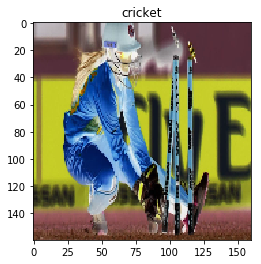

In [21]:
plotImage(data[0],labels[0])

In [0]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

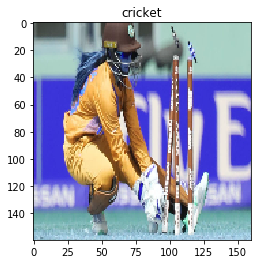

In [23]:
plotImage(data[0],labels[0])

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [25]:
type(trainX)

numpy.ndarray

In [0]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)


In [196]:
trainY[0]

array([0., 1.], dtype=float32)

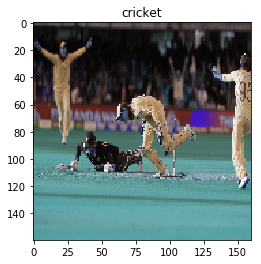

In [197]:
plotImage(trainX[0],1)

In [0]:
from keras.applications import MobileNetV2

In [0]:
base_model =MobileNetV2(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
from keras.layers import Dense,GlobalAveragePooling2D

In [0]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
from keras.layers import Dropout

In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x) #dense layer 2
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [0]:
from keras.models import Model

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [173]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_8
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [0]:
for layer in model.layers:
    layer.trainable=True

In [0]:
for layer in base_model.layers[:65]:
    layer.trainable =  False

In [0]:
base_learning_rate = 0.0001

In [0]:
from keras.optimizers import Adam

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [179]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
# len(model.trainable_variables)

I guess I am not missing anything

In [0]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1,
                         shear_range=0.2, zoom_range=0.2,horizontal_flip=True,
                         fill_mode="nearest")

In [0]:
from keras.callbacks import EarlyStopping

In [0]:
es=EarlyStopping(monitor='val_loss', verbose=0, mode='auto', baseline=87, restore_best_weights=True)

In [186]:
history_fine = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),validation_data=(testX, testY),
                        epochs=50, verbose=1,callbacks=[es])

Epoch 1/50
5/5 [==============================] - 20s 4s/step - loss: 0.6830 - acc: 0.6072 - val_loss: 0.7571 - val_acc: 0.5306
Epoch 2/50
5/5 [==============================] - 1s 139ms/step - loss: 0.6318 - acc: 0.6488 - val_loss: 0.7401 - val_acc: 0.5102
Epoch 3/50
5/5 [==============================] - 1s 228ms/step - loss: 0.6743 - acc: 0.5811 - val_loss: 0.7251 - val_acc: 0.5102
Epoch 4/50
5/5 [==============================] - 1s 218ms/step - loss: 0.6437 - acc: 0.6587 - val_loss: 0.7104 - val_acc: 0.5102
Epoch 5/50
5/5 [==============================] - 1s 230ms/step - loss: 0.6128 - acc: 0.6679 - val_loss: 0.6949 - val_acc: 0.5306
Epoch 6/50
5/5 [==============================] - 1s 223ms/step - loss: 0.6026 - acc: 0.6714 - val_loss: 0.6777 - val_acc: 0.5510
Epoch 7/50
5/5 [==============================] - 1s 233ms/step - loss: 0.5706 - acc: 0.7321 - val_loss: 0.6654 - val_acc: 0.6122
Epoch 8/50
5/5 [==============================] - 1s 226ms/step - loss: 0.5625 - acc: 0.6960

In [187]:
print(history_fine.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


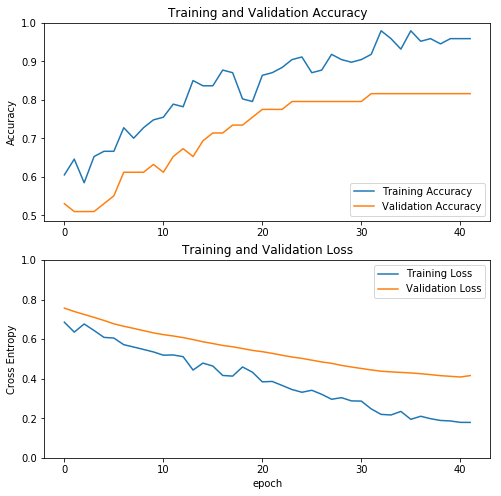

In [188]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
model.save_weights('SixthTraining.h5')

In [190]:
os.listdir(os.getcwd())

['food review',
 'bluebook for bulldozers',
 'titanic',
 'processedData.csv',
 'cricket vs baseball',
 'firstTraining.h5',
 'SecondTraining.h5',
 'ThirdTraining.h5',
 'FourthTrainingWorstModel.h5',
 'FiveTraining.h5',
 'SixthTraining.h5']

In [191]:
maxValAcc=max(val_acc)
maxTrainAcc=max(acc)
maxValAcc, maxTrainAcc

(0.8163265427764581, 0.9795918367346939)

In [0]:
# from google.colab import files
# files.download('firstTraining.h5')
# first model gave us max trainAcc of 97% and maxValAcc of 83%

In [0]:
# second model gave us max trainAcc of 91% and maxValAcc of 87%, when we used dropout and clearly we reduced some overfitting

Third Model we have, with more Epochs we have third model having 100% training accuracy and 85% val accuracy

Fourth Model is the worst model, with high dropout we have highly unpredictable model

Fifth model is 85% val and 97% train acc

Sixth Modle 97% and 81%

In [0]:
def seeResults(data,labels,predicts):
  num_rows = 6
  num_cols = 3
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(6,3,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(data[i])

    c=''
    if ((labels[i]=='cricket' and predicts[i]=='cricket') or (labels[i]=='baseball' and predicts[i]=='baseball')):
      c='green'
    else:
      c='red'
    
    plt.xlabel("Predicted= {}, Correct is {} ".format(predicts[i],labels[i]),
                                color=c)
  plt.tight_layout()
  plt.show()

In [260]:
testY[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
predictions=model.predict(testX[0:18])
predictions

In [0]:
Labels=[]
Predictions=[]
for p in predictions:
  if(p[0]>p[1]):
    Predictions.append("baseball")
    Labels.append("baseball")
  else:
    Predictions.append("cricket")
    Labels.append("cricket")

In [0]:
Labels

In [0]:
# make a function that would select 18 images at random

49

In [0]:
def getResults(data,labels):
  print(len(data))
  predictions=model.predict(data)
  print(len(predictions))
  Labels=[]
  Predictions=[]
  i=0
  for p in predictions:
    if(p[0]>p[1]):
      Predictions.append("baseball")
      Labels.append("baseball" if labels[i][0]==1 else "cricket")
    else:
      Predictions.append("cricket")
      Labels.append("cricket" if labels[i][1]==1 else "baseball")
    i=i+1
  print('Labels are ',len(Labels),'and Preds',len(Predictions))
  seeResults(data,Labels,Predictions)

18
18
Labels are  18 and Preds 18


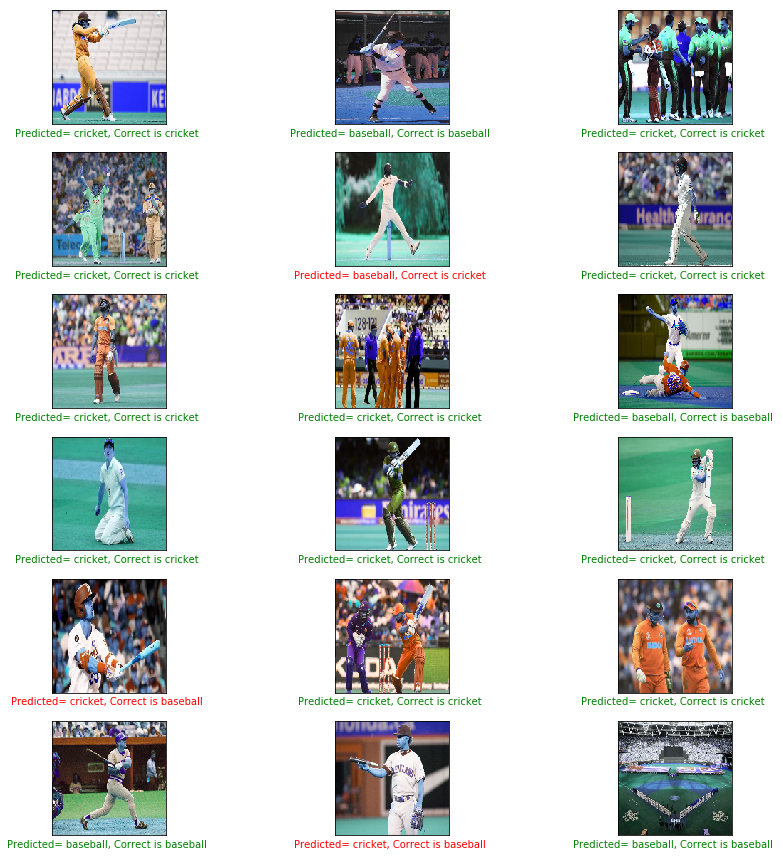

In [266]:
getResults(testX[18:36],testY[18:36])